In [1]:
import NeuNorm as neunorm
from NeuNorm.normalization import Normalization

from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

from ipywidgets.widgets import interact
from ipywidgets import widgets
from IPython.core.display import display, HTML

import copy

# histogram
from skimage import data, img_as_float

In [15]:
input_folder = "/Users/j35/IPTS/stickB_sample1/"
assert Path(input_folder).exists()

In [16]:
# load images

In [17]:
o_norm = Normalization()
o_norm.load(folder=input_folder, notebook=True)

In [18]:
image_data = copy.deepcopy(o_norm.data['sample']['data'])

In [19]:
# display stack and histogram

In [20]:
def plot_histogram(image_index):
    fig1 = plt.figure(figsize=(20, 10))

    ax_img1 = plt.subplot(121)
    ax_img1.hist(image_data[image_index].ravel(), histtype='step', bins=256)
    ax_img1.set_xlabel('Pixel Intensity')
    ax_img1.set_ylabel("Number of pixels")

    ax_img2 = plt.subplot(122)
    ax_img2.imshow(image_data[image_index], cmap='viridis')
    plt.show()
    
preview = interact(plot_histogram,
              image_index = widgets.IntSlider(min=0, 
                                            max=len(image_data)-1,
                                            step=1,
                                            value=0,
                                            description='Image Index',
                                            continuous_update=False))


interactive(children=(IntSlider(value=0, continuous_update=False, description='Image Index', max=339), Output(…

In [174]:
# simple segmentation

In [22]:
image1 = image_data[0].copy()
index_image1_below_threshold = image1 > 15000
image1[index_image1_below_threshold] = 0

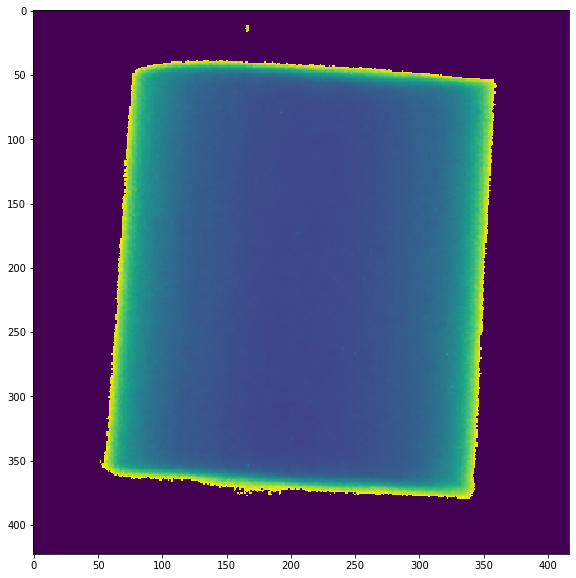

In [23]:
fig12= plt.figure(figsize=(10, 10))

ax_img2 = plt.subplot(111)
ax_img2.imshow(image1, cmap='viridis')
plt.show()
    

In [74]:
list_of_thresholds = np.zeros((len(image_data)))
list_of_thresholds[:] = 15000
list_of_thresholds[252:] = 15100
list_of_thresholds[275:] = 15200
list_of_thresholds[290:] = 15250
list_of_thresholds[300:] = 15400
list_of_thresholds[320:] = 15450

list_of_crops = np.zeros((len(image_data), 2))
list_of_crops[:,0] = 360; list_of_crops[:,1] = 20
index=700; list_of_crops[index:,0] = 360; list_of_crops[index:,1] = 70
index=1300; list_of_crops[index:,0] = 360; list_of_crops[index:,1] = 100
index=1650; list_of_crops[index:,0] = 360; list_of_crops[index:,1] = 100
index=2439; list_of_crops[index:,0] = 360; list_of_crops[index:,1] = 70


In [75]:
def plot_threshold(image_index):
    fig3 = plt.figure(figsize=(20, 10))

    image = image_data[image_index].copy()
    threshold = list_of_thresholds[image_index]
    
    ax_img3a = plt.subplot(131)
    ax_img3a.imshow(image, cmap='viridis')

    ax_img3b = plt.subplot(132)
    ax_img3b.hist(image.ravel(), histtype='step', bins=256)
    ax_img3b.set_xlabel('Pixel Intensity')
    ax_img3b.set_ylabel("Number of pixels")
    ax_img3b.axvline(x=threshold, color='r')
    
    index_image_below_threshold = image > threshold
    image[index_image_below_threshold] = 0

    ax_img3c = plt.subplot(133)
    ax_img3c.imshow(image, cmap='viridis')
    ax_img3c.axvline(list_of_crops[image_index,0], color='w')
    ax_img3c.axhline(list_of_crops[image_index,1], color='w')
    
    plt.show()
    
preview = interact(plot_threshold,
              image_index = widgets.IntSlider(min=0, 
                                            max=len(image_data)-1,
                                            step=1,
                                            value=0,
                                            description='Image Index',
                                            continuous_update=False))


interactive(children=(IntSlider(value=0, continuous_update=False, description='Image Index', max=339), Output(…

In [71]:
# figuring out the threshold value

In [33]:
# image_index = 3000
# threshold = 37500

# # fig4 = pltfigure(figsize=(20, 10))
# image = image_data[image_index].copy()
# ax_img4a = plt.subplot(131)
# ax_img4a.imshow(image, cmap='viridis')
# ax_img4b = plt.subplot(132)
# ax_img4b.hist(image.ravel(), histtype='step', bins=256)
# ax_img4b.set_xlabel('Pixel Intensity')
# ax_img4b.set_ylabel("Number of pixels")
# ax_img4b.axvline(x=threshold, color='r')
# index_image_below_threshold = image > threshold
# image[index_image_below_threshold] = 0
# ax_img4c = plt.subplot(133)
# ax_img4c.imshow(image, cmap='viridis')
# plt.show()

In [34]:
# cropping and segmentation

In [76]:
final_image = copy.deepcopy(image_data)
for _index, _image in enumerate(final_image):
    
    _threshold = list_of_thresholds[_index]
    [crop_x, crop_y] = list_of_crops[_index]

    index_image_below_threshold = _image > _threshold
    _image[index_image_below_threshold] = 0
    
    _image[:int(crop_y), :] = 0
    _image[:, int(crop_x):] = 0
    
    final_image[_index] = _image

In [77]:
def plot_final_image(image_index):
    fig4 = plt.figure(figsize=(20, 10))

    image = final_image[image_index]
    raw_image = image_data[image_index]

    ax_img4a = plt.subplot(121)
    ax_img4a.imshow(image, cmap='viridis')

    ax_img4a = plt.subplot(122)
    ax_img4a.imshow(raw_image, cmap='viridis')
    
    plt.show()
    
preview = interact(plot_final_image,
              image_index = widgets.IntSlider(min=0, 
                                            max=len(image_data)-1,
                                            step=1,
                                            value=0,
                                            description='Image Index',
                                            continuous_update=False))


interactive(children=(IntSlider(value=0, continuous_update=False, description='Image Index', max=339), Output(…

# final plot of size of sample image index

Text(0.5, 1.0, 'Width of sample vs image index')

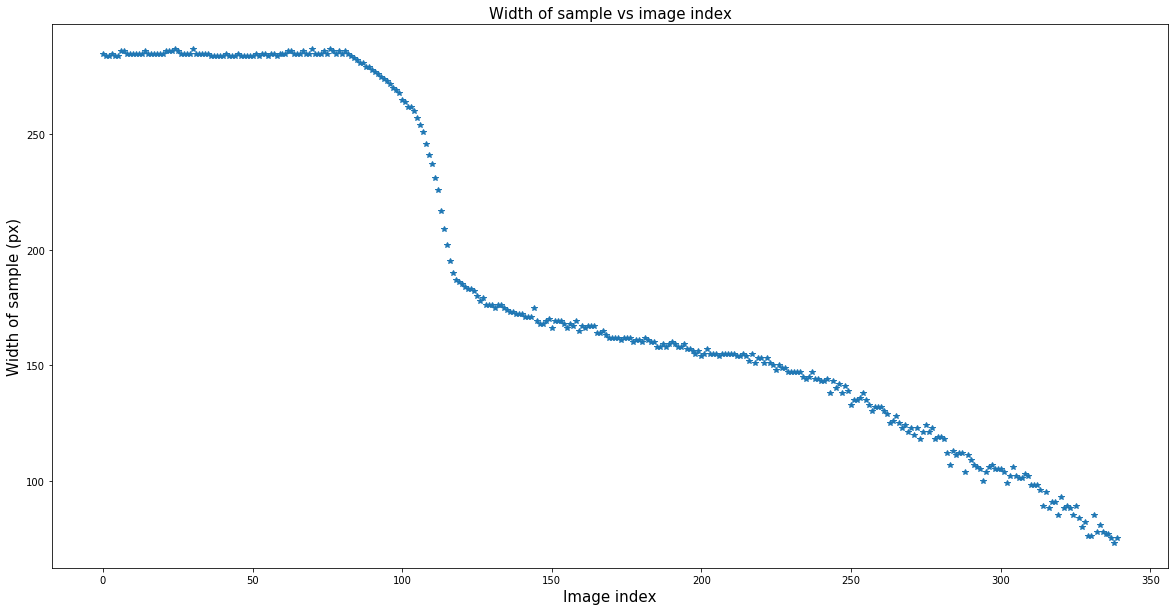

In [79]:
sample_size = np.zeros(len(final_image))
for _index, _array in enumerate(final_image):
    # at height 200px
    _slice = _array[200,:]
    sample_size[_index] = np.count_nonzero(_slice)

fig5 = plt.figure(figsize=(20, 10))
ax_img5 = plt.subplot(111)
ax_img5.plot(sample_size, '*')

ax_img5.set_xlabel("Image index", fontsize=15)
ax_img5.set_ylabel("Width of sample (px)", fontsize=15)
ax_img5.set_title("Width of sample vs image index", fontsize=15)

Text(0.5, 1.0, 'Height of sample vs image index')

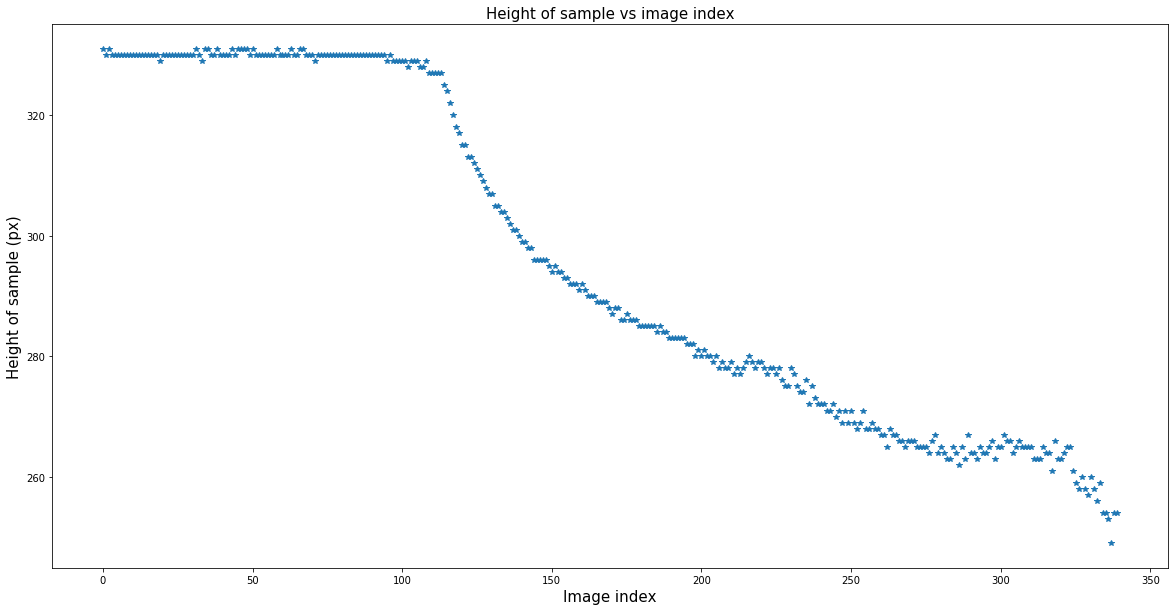

In [80]:
sample_size = np.zeros(len(final_image))
for _index, _array in enumerate(final_image):
    # at width 200px
    _slice = _array[:,200]
    sample_size[_index] = np.count_nonzero(_slice)

fig5 = plt.figure(figsize=(20, 10))
ax_img5 = plt.subplot(111)
ax_img5.plot(sample_size, '*')

ax_img5.set_xlabel("Image index", fontsize=15)
ax_img5.set_ylabel("Height of sample (px)", fontsize=15)
ax_img5.set_title("Height of sample vs image index", fontsize=15)